In [ ]:
#The Sparks Foundation - Data Science & Business Analytics Internship
#Task 3: Perform 'Exploratory Data Analysis' on 'SampleSuperStore'
#Dataset: https://bit.ly/3i4rbWl
#Technologies:- Python, Pandas, Numpy, Seaborn
#Shreyans Pandit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings as wg
wg.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/home/shrey/Documents/SampleSuperstore.csv")
#Reading csv


In [12]:
df.head(100)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Standard Class,Home Office,United States,Portland,Oregon,West,Office Supplies,Binders,5.6820,1,0.70,-3.7880
96,Second Class,Home Office,United States,New York City,New York,East,Furniture,Furnishings,96.5300,7,0.00,40.5426
97,First Class,Consumer,United States,San Francisco,California,West,Office Supplies,Binders,51.3120,3,0.20,17.9592
98,Standard Class,Corporate,United States,Saint Paul,Minnesota,Central,Office Supplies,Appliances,77.8800,6,0.00,22.5852


In [4]:
df.columns
#Printing the columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
df.shape

#checking the shape of dataset

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
#checking null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
#removing postal code because it's unnecessary
df = df.drop(['Postal Code'], axis = 1)

In [11]:
df.head(5)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


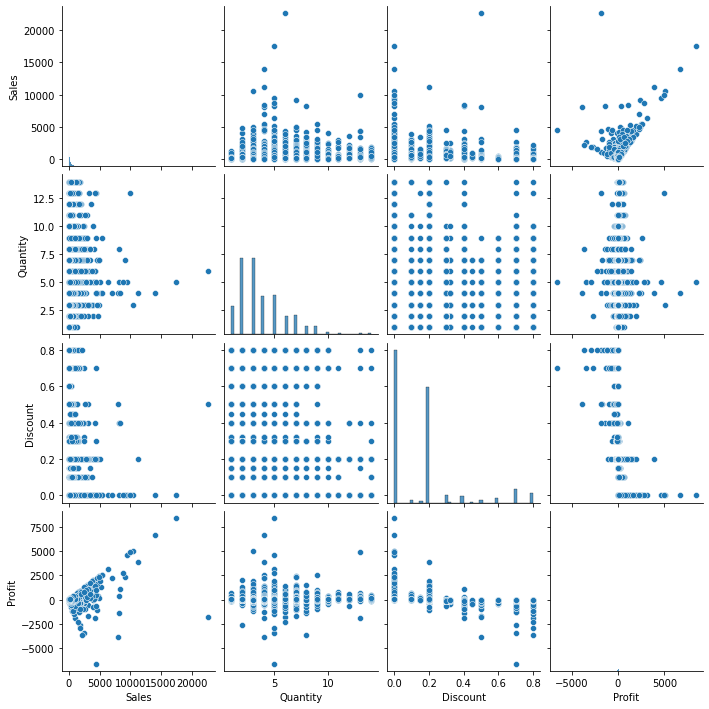

In [13]:
#Displaying pairplot using seaborn
sns.pairplot(df)

<Figure size 720x360 with 0 Axes>

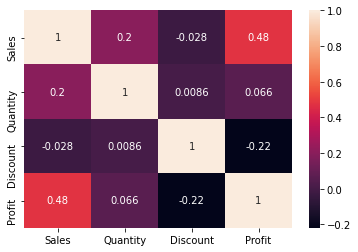

<Figure size 720x360 with 0 Axes>

In [14]:
#using heatmap to check correlation
sns.heatmap(df.corr(), annot = True)
plt.figure(figsize=(10, 5))


<Figure size 1440x2880 with 0 Axes>

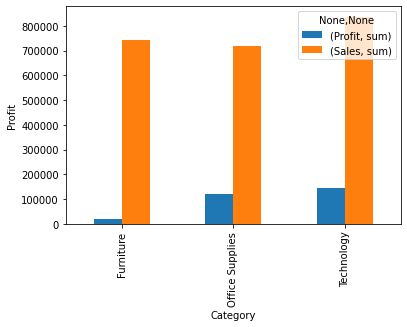

In [22]:
#Visualising Sales vs Profit
plt.figure(figsize= (20,40))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

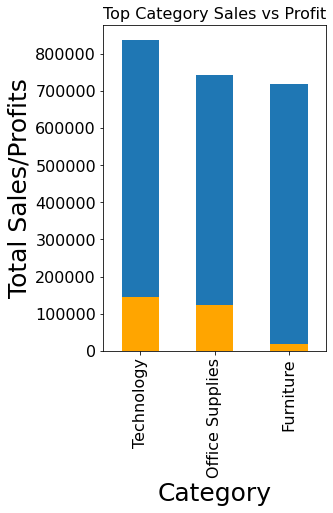

In [58]:
top_category_s = df.groupby("Category").Sales.sum().nlargest(n=100)
top_category_p = df.groupby("Category").Profit.sum().nlargest(n=100)

top_category_s.plot(kind = 'bar',figsize = (4,6),fontsize = 10)
top_category_p.plot(kind = 'bar',figsize = (4,6),fontsize = 16,color='ORANGE')
plt.xlabel('Category',fontsize = 25)
plt.ylabel('Total Sales/Profits',fontsize = 25)
plt.title("Top Category Sales vs Profit",fontsize = 16)
plt.show()

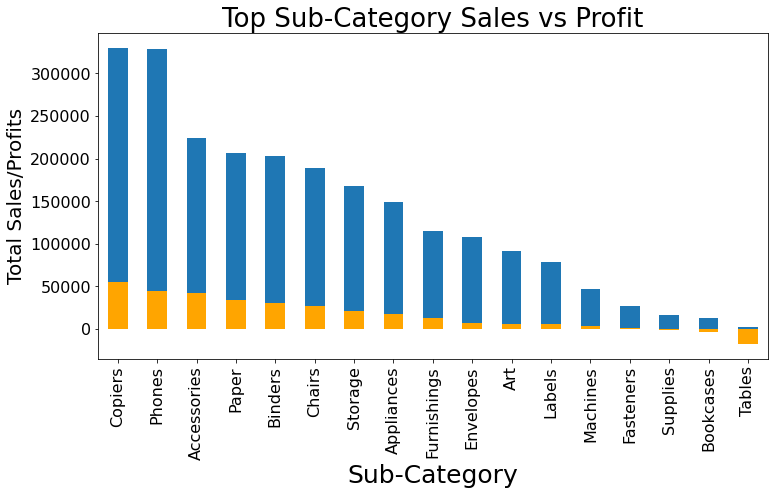

In [57]:
#Visualising by the sub-categories of sales items
top_subcategory_s = df.groupby("Sub-Category").Sales.sum().nlargest(n = 100)
top_subcategory_p = df.groupby("Sub-Category").Profit.sum().nlargest(n = 100)

top_subcategory_s.plot(kind = 'bar',figsize = (10,10),fontsize = 18)
top_subcategory_p.plot(kind = 'bar',figsize = (12,6),fontsize = 16, color = 'ORANGE')
plt.xlabel('Sub-Category',fontsize = 25)
plt.ylabel('Total Sales/Profits',fontsize = 20)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 26)
plt.show()

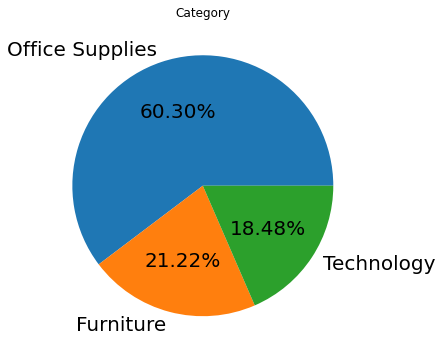

In [66]:
#Plotting a pie chart to differentiate the sales by Category
plt.figure(figsize = (6,6))
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index,autopct='%1.2f%%',textprops = {"fontsize":20})
plt.show()

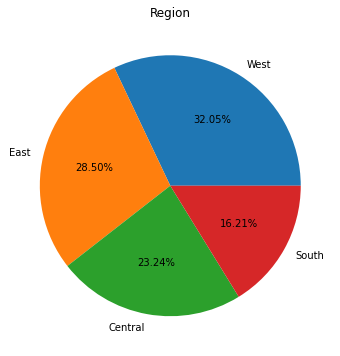

In [67]:
#Plotting a pie chart for sales and Profits in different regions
plt.figure(figsize = (6,6))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.2f%%')
plt.show()

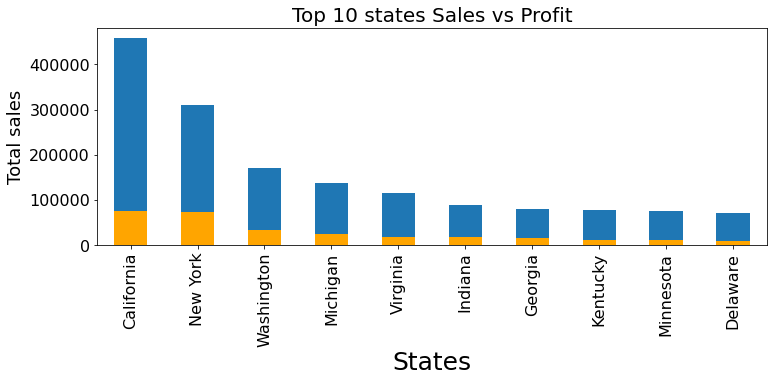

In [75]:
#Sales and profits by states
top_states_s = df.groupby("State").Sales.sum().nlargest(n=10)
top_states_p = df.groupby("State").Profit.sum().nlargest(n = 10)

top_states_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_states_p.plot(kind = 'bar',figsize = (12,4),fontsize = 16, color = 'ORANGE')
plt.xlabel('States',fontsize = 25)
plt.ylabel('Total sales',fontsize = 18)
plt.title("Top 10 states Sales vs Profit",fontsize = 20)
plt.show()

In [ ]:
#From above graph, we can see California and New York having more sales and profits as compared to other states

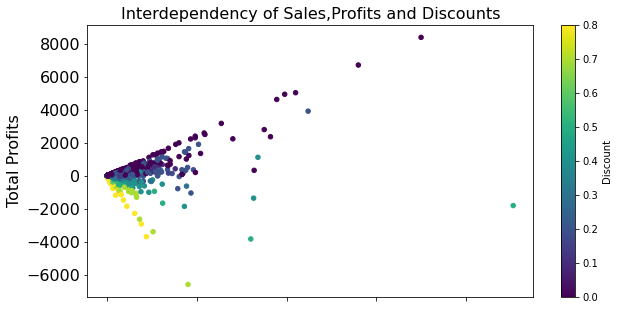

In [76]:
df.plot(kind = "scatter",figsize = (10,5), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()

In [ ]:
#From above graph, we can see that if we give more discount it will increase the sales but will lead to
#decrease in profit.

In [ ]:
#Conclusion :
#To make more profit we should:

#Minimize the sub-categories sales table
#Limit the sales of furniture as these are less profitable if we consider it with sales of other items.
#Concentrate on California and New York, these states are major area for profiting the business.